In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot



In [2]:
sp=pd.read_csv("50_Startups.csv")


In [3]:
sp=sp.rename(columns={'R&D Spend':'R_Spend','Administration':'Admin','Marketing Spend':'M_Spend'})

In [4]:
sp.head()

,R_Spend,Admin,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
sp.shape

(50, 5)

In [6]:
sp.describe()

,R_Spend,Admin,M_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
sp.corr()

,R_Spend,Admin,M_Spend,Profit
R_Spend,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
M_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R_Spend  50 non-null     float64
 1   Admin    50 non-null     float64
 2   M_Spend  50 non-null     float64
 3   State    50 non-null     object 
 4   Profit   50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
# check for missing value
sp.isna().sum()

R_Spend    0
Admin      0
M_Spend    0
State      0
Profit     0
dtype: int64

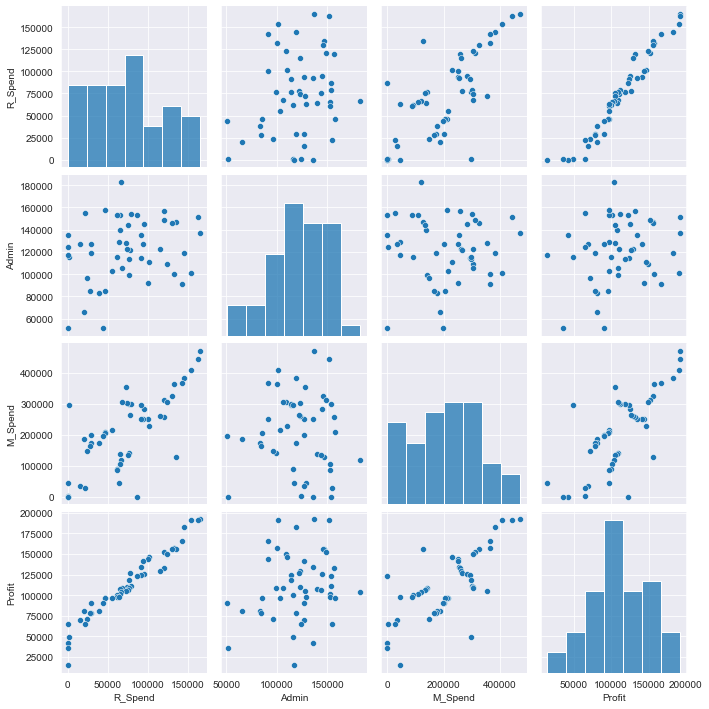

In [10]:
# scatterplot between variable along with histogrm
sns.set_style(style='darkgrid')
sns.pairplot(sp)

In [11]:
# preparing a model

In [12]:
model=smf.ols('Profit~R_Spend+Admin+M_Spend+State',data=sp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.34e-27
Time:                        11:49:52   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
R_Spend               0.8060      0.046     17.369      0.000       0.712       0.900
Admin                -0.0270      0.052     -0.517      0.608      -0.132       0.078
M_Spend               0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
R_Spend                  0.806023
Admin                   -0.027004
M_Spend                  0.026980
dtype: float64

In [14]:
# simple Linear Regrassion Model

In [15]:
model_S=smf.ols('Profit~State',data=sp).fit()
print(model_S.tvalues,'\n',model_S.pvalues)

Intercept            10.536302
State[T.Florida]      1.049860
State[T.New York]     0.706364
dtype: float64 
 Intercept            5.774813e-14
State[T.Florida]     2.991510e-01
State[T.New York]    4.834492e-01
dtype: float64


In [16]:
model_S.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5748
Date:                Mon, 12 Sep 2022   Prob (F-statistic):              0.567
Time:                        11:49:52   Log-Likelihood:                -600.05
No. Observations:                  50   AIC:                             1206.
Df Residuals:                      47   BIC:                             1212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.039e+05   9861.636     10.536      0.000    8.41e+04    1.24e+05
State[T.Florida]   1.487e+04   1.42e+04      1.050      0.299   -1.36e+04    4.34e+04
State[T.New York]  9851.2712   1.39e+04      0.706      0.483   -1.82e+04    3.79e+04
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.207
Skew:                           0.104   Prob(JB):                        0.902
Kurtosis:                       2.762   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model_R=smf.ols('Profit~R_Spend',data=sp).fit()
print(model_R.tvalues,'\n',model_R.pvalues)

Intercept    19.320288
R_Spend      29.151139
dtype: float64 
 Intercept    2.782697e-24
R_Spend      3.500322e-32
dtype: float64


In [18]:
model_A=smf.ols('Profit~Admin',data=sp).fit()
print(model_A.tvalues,'\n',model_A.pvalues)

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [19]:
model_M=smf.ols('Profit~M_Spend',data=sp).fit()
print(model_M.tvalues,'\n',model_M.pvalues)

Intercept    7.808356
M_Spend      7.802657
dtype: float64 
 Intercept    4.294735e-10
M_Spend      4.381073e-10
dtype: float64


In [20]:
model_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           4.38e-10
Time:                        11:49:53   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
M_Spend        0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_RM=smf.ols('Profit~R_Spend+M_Spend',data=sp).fit()
print(model_RM.tvalues,'\n',model_RM.pvalues)

Intercept    17.463582
R_Spend      19.265555
M_Spend       1.927052
dtype: float64 
 Intercept    3.504062e-22
R_Spend      6.040433e-24
M_Spend      6.003040e-02
dtype: float64


In [22]:
model_RM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           2.16e-31
Time:                        11:49:53   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_Spend        0.7966      0.041     19.266      0.000       0.713       0.880
M_Spend        0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#calculate Vif


In [24]:
sp.head()

,R_Spend,Admin,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
rsq_R_Spend=smf.ols('R_Spend~Admin+M_Spend+State',data=sp).fit().rsquared
vif_R_Spend=1/(1-rsq_R_Spend)


In [26]:
rsq_Admin=smf.ols('Admin~R_Spend+M_Spend+State',data=sp).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

In [27]:
rsq_M_Spend=smf.ols('M_Spend~R_Spend+Admin+State',data=sp).fit().rsquared
vif_M_Spend=1/(1-rsq_M_Spend)

In [28]:
d1={'variables':['M_Spend','R_Spend','Admin'],'vif':[vif_M_Spend,vif_R_Spend,vif_Admin]}
vif_frame=pd.DataFrame(d1)


In [29]:
vif_frame

,variables,vif
0,M_Spend,2.416797
1,R_Spend,2.495511
2,Admin,1.177766


In [30]:
#Residual Analysis
#Test for Normality of Residuals (Q-Q Plot)

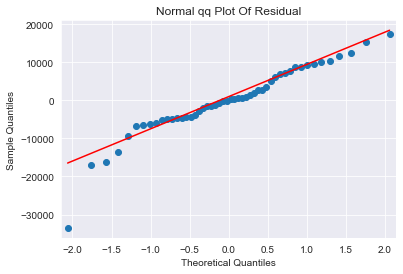

In [31]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal qq Plot Of Residual")
plt.show()



In [32]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [33]:
# Residual Plot Homoscedasticity

def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()
    

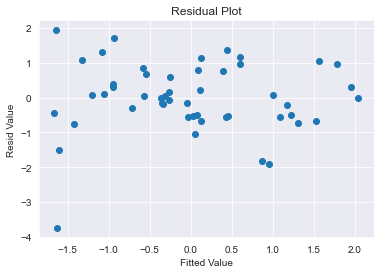

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Fitted Value")
plt.ylabel("Resid Value")
plt.show()

In [35]:
# Residual Vs Regressior


eval_env: 1


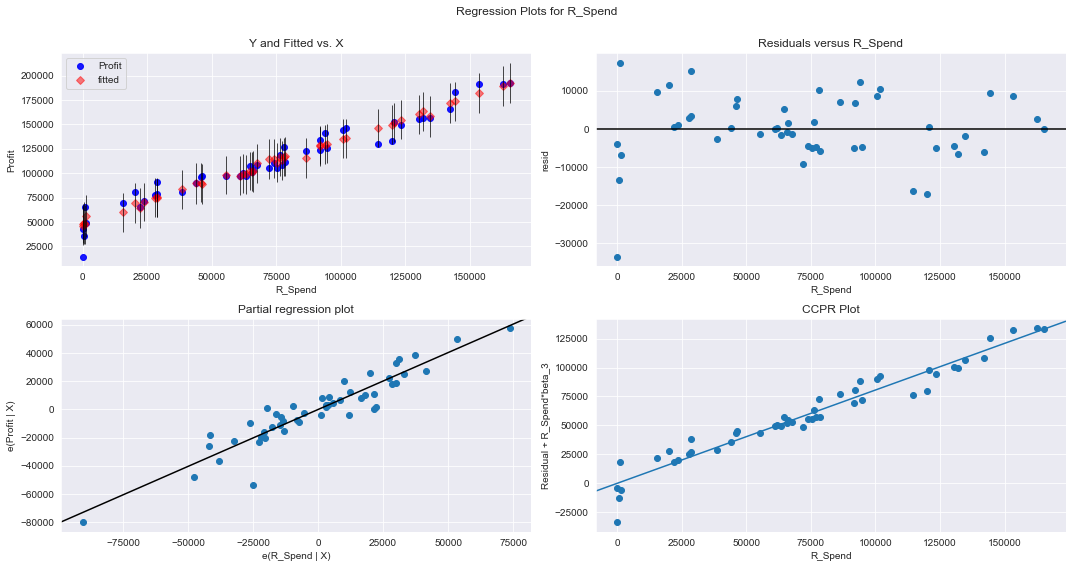

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"R_Spend",fig=fig)
plt.show()

eval_env: 1


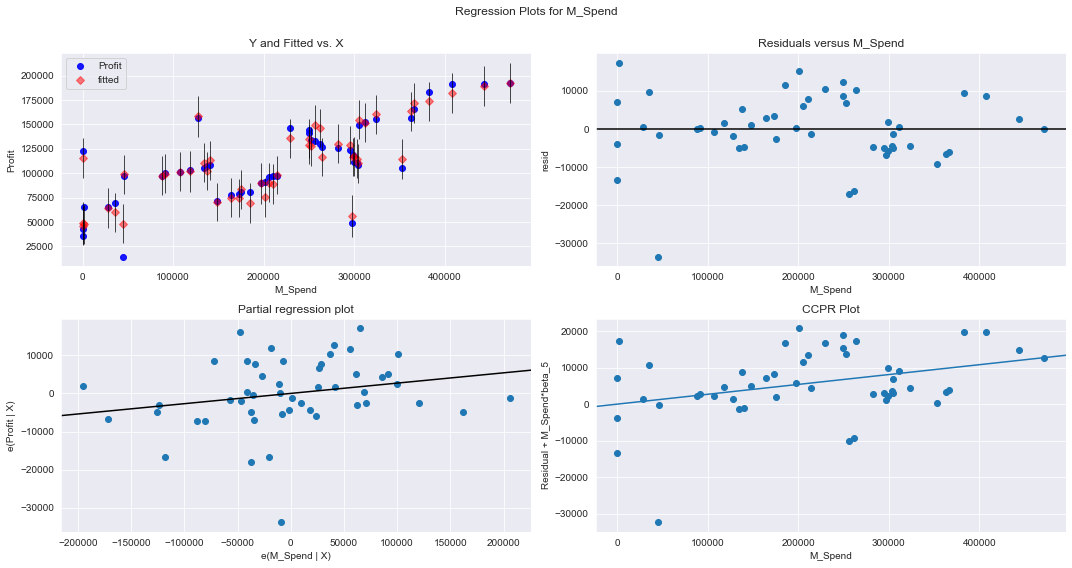

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"M_Spend",fig=fig)
plt.show()

eval_env: 1


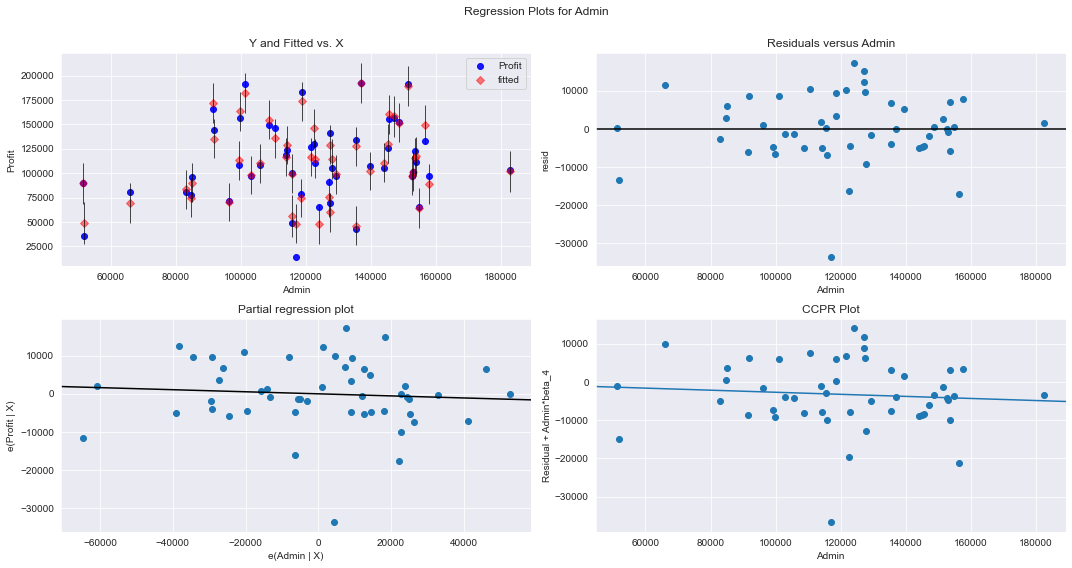

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Admin",fig=fig)
plt.show()

In [39]:
#model Deletation Diagnosis
#Detecting influnceir and outlier
#cooks Distence

In [40]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

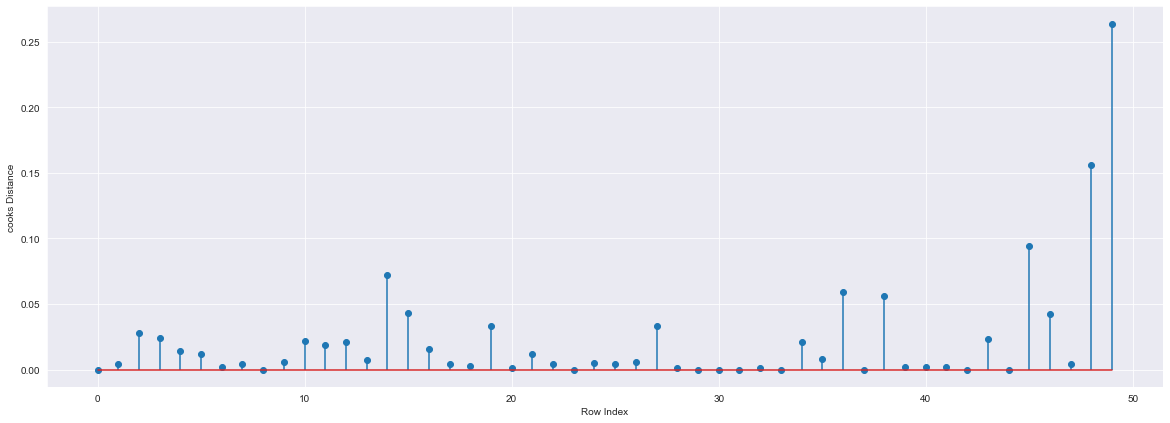

In [41]:
#Plot the influencers values using stem plot

fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(sp)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("cooks Distance")
plt.show()


In [42]:
(np.argmax(c),np.max(c))

(49, 0.26395943587041654)

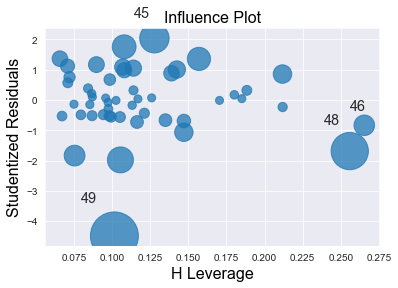

In [43]:
#high Influnce Points

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
k=4
n=sp.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.30000000000000004